In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score , f1_score
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import GridSearchCV , train_test_split

In [ ]:
data_train = pd.read_csv('/content/Train-dataset.csv')
data_valid = pd.read_csv('/content/Validation-dataset.csv')

In [ ]:
data_train.head()

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.939,3.166,0.250,2.344,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.166,3.135,0.246,2.352,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.055,3.089,0.244,2.352,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.352,3.042,0.242,2.355,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.614,3.003,0.241,2.369,Marine,Sandy marl,1300


In [ ]:
data_valid.head()

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT
0,Well-X,2.9956,0.0061,897.065,92.7094,4.51768,0.36366,2.2106,Continental
1,Well-X,2.9956,0.0061,897.165,93.9007,4.30683,0.36951,2.2036,Continental
2,Well-X,2.9956,0.0061,897.265,94.8446,3.98902,0.37914,2.1969,Continental
3,Well-X,2.9956,0.0061,897.365,95.6321,3.67028,0.39020,2.1923,Continental
4,Well-X,2.9956,0.0061,897.465,96.4700,3.63431,0.40098,2.1926,Continental


## checking for Nan elements

In [ ]:
data_train.isnull().sum()

WELL                        0
X                           0
Y                           0
MD                          0
GR                          0
RT                          0
CN                          0
DEN                         0
DEPOSITIONAL_ENVIRONMENT    0
LITH_NAME                   0
LITH_CODE                   0
dtype: int64

## Categorical and numerical features

In [ ]:
cat_cols = ['WELL',
            'DEPOSITIONAL_ENVIRONMENT',
            'LITH_NAME']

num_cols = ['X',
            'Y',
            'MD',
            'GR',
            'RT',
            'CN',
            'DEN']

## Displaying data for numerical features

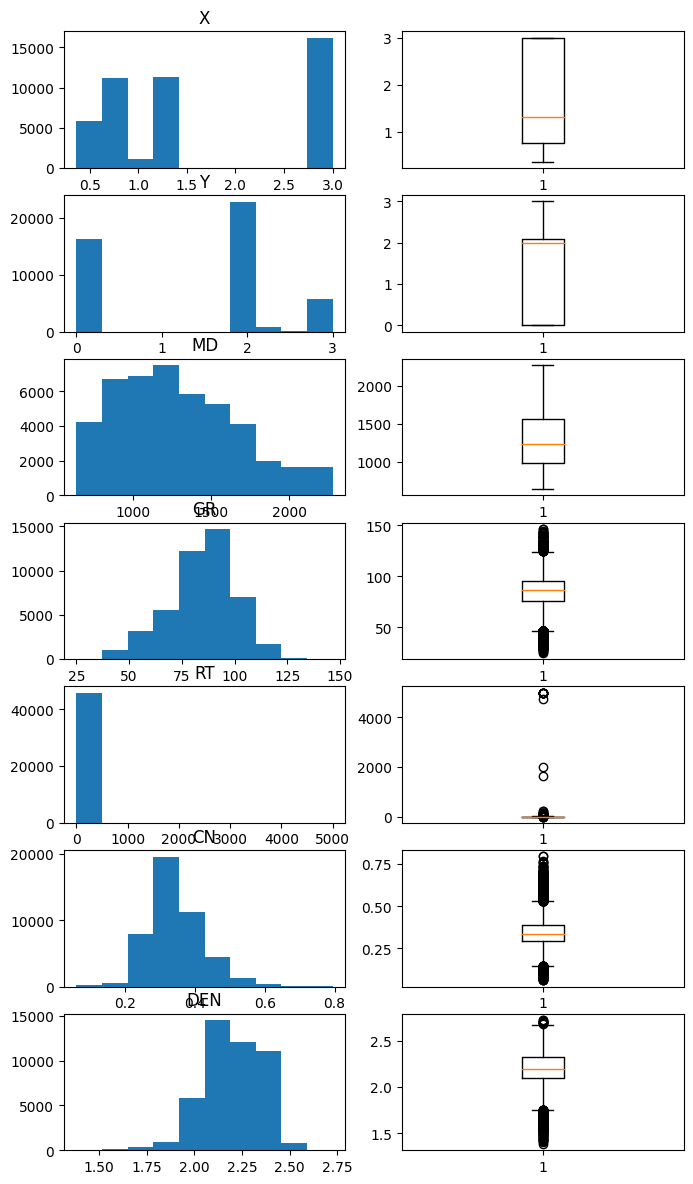

In [ ]:
plt.figure(figsize=(8, 30), dpi=100)
n = len(num_cols)
for i, col in enumerate(num_cols):
    plt.subplot(2*n, 2, 2*i+1)
    plt.hist(data_train[col], bins=10)
    plt.title(col)
    plt.subplot(2*n, 2, 2*i+2)
    plt.boxplot(data_train[col].values)

## Displaying data for categorical features

In [ ]:
plt.figure(figsize=(25, 100), dpi=100)
n = len(cat_cols)
for i, col in enumerate(cat_cols):
    value_counts = data_train[col].value_counts()
    plt.subplot(2*n,2,2*i+1)
    plt.pie(value_counts, labels=value_counts.index)
    plt.subplot(2*n,2,2*i+2)
    plt.bar(np.arange(len(value_counts)), value_counts, tick_label=value_counts.index)
    plt.ylabel(col)

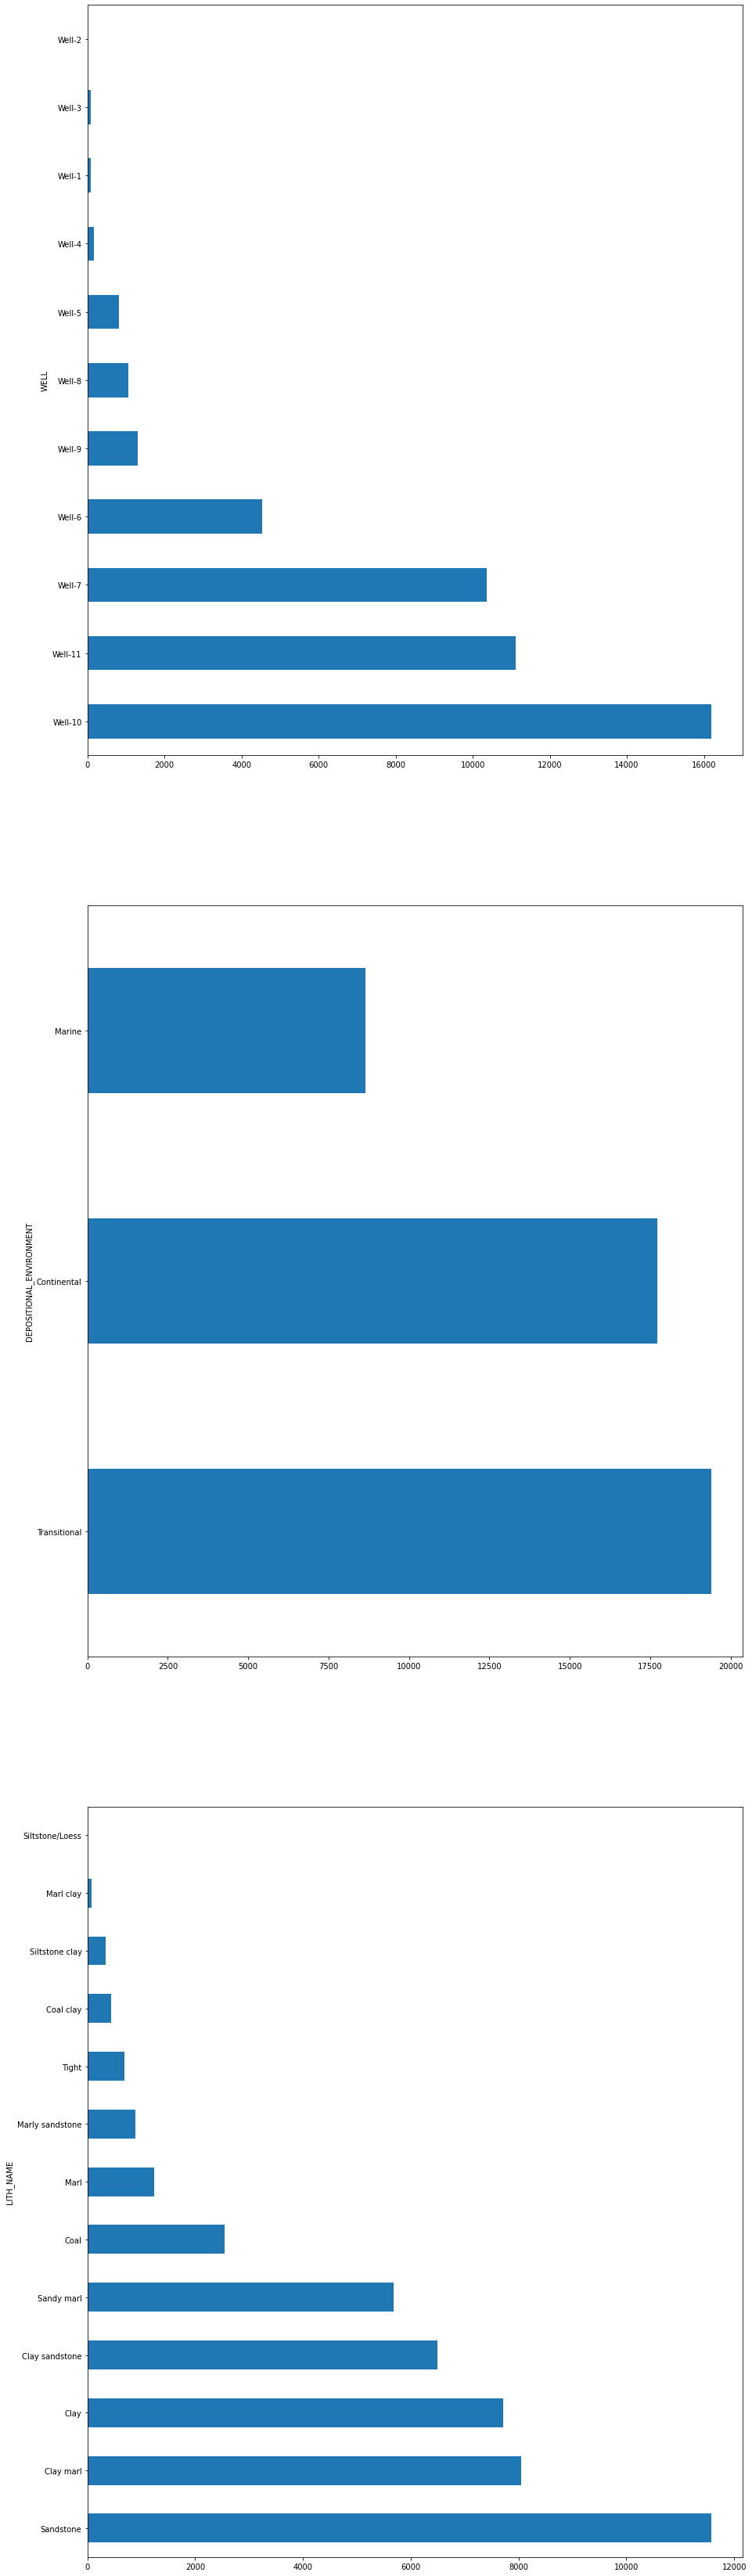

In [ ]:
n = len(cat_cols)
for i, col in enumerate(cat_cols):
    value_counts = data_train[col].value_counts()
    plt.subplot(n,1,i+1)
    value_counts.plot(kind="barh", figsize=(15, 60))
    plt.ylabel(col)

In [ ]:
data_train.head()

,WELL,X,Y,MD,GR,RT,CN,DEN,DEPOSITIONAL_ENVIRONMENT,LITH_NAME,LITH_CODE
0,Well-1,0.8179,2.9814,1602.0,83.939,3.166,0.250,2.344,Marine,Marly sandstone,1200
1,Well-1,0.8179,2.9814,1602.1,84.166,3.135,0.246,2.352,Marine,Marly sandstone,1200
2,Well-1,0.8179,2.9814,1602.2,85.055,3.089,0.244,2.352,Marine,Marly sandstone,1200
3,Well-1,0.8179,2.9814,1602.3,86.352,3.042,0.242,2.355,Marine,Sandy marl,1300
4,Well-1,0.8179,2.9814,1602.4,87.614,3.003,0.241,2.369,Marine,Sandy marl,1300


In [ ]:
le = LabelEncoder()
data_train['WELL'] = le.fit_transform(data_train['WELL'])
data_train['DEPOSITIONAL_ENVIRONMENT'] = le.fit_transform(data_train['DEPOSITIONAL_ENVIRONMENT'])
data_train['LITH_NAME'] = le.fit_transform(data_train['LITH_NAME'])
data_valid['DEPOSITIONAL_ENVIRONMENT'] = le.fit_transform(data_valid['DEPOSITIONAL_ENVIRONMENT'])
data_valid['WELL'] = le.fit_transform(data_valid['WELL'])

In [ ]:
Feature = data_train[['MD','GR', 'RT', 'DEN', 'CN','DEPOSITIONAL_ENVIRONMENT']]

In [ ]:
X = Feature
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [ ]:
y = data_train['LITH_CODE']
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print("Train set accuracy: ", round(f1_score(y_train, knn.predict(X_train), average='weighted'), 2))
print("Test set accuracy: ", round(f1_score(y_test, y_pred, average='weighted'), 2))

Train set accuracy:  0.89
Test set accuracy:  0.83


In [ ]:
params = {'n_neighbors' : [3,4,5,6,7,8,9,10,11]}

In [ ]:
knn_cv = GridSearchCV(knn,params , n_jobs= - 1 , cv = 5)
knn_cv.fit(X_train,y_train)
y_pred_cv = knn_cv.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [ ]:
print("Train set accuracy: ", round(f1_score(y_train, knn_cv.predict(X_train), average='weighted'), 2))
print("Test set accuracy: ", round(f1_score(y_test, y_pred_cv, average='weighted'), 2))

Train set accuracy:  0.87
Test set accuracy:  0.82


In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat = CatBoostClassifier()
cat.fit(X_train,y_train)
y_pred_cat = cat.predict(X_test)

In [ ]:
print("Train set accuracy: ", round(f1_score(y_train, cat.predict(X_train), average='weighted'), 2))
print("Test set accuracy: ", round(f1_score(y_test, y_pred_cat, average='weighted'), 2))

Train set accuracy:  0.93
Test set accuracy:  0.89


In [ ]:
grid = {'learning_rate': [0.10, 0.15, 0.20],
        'depth': [3, 4, 5, 6 , 7 , 8],
        'l2_leaf_reg': [1, 3],
        'n_estimators': [100, 500]}
classifier = GridSearchCV(CatBoostClassifier(verbose = True , task_type='GPU',devices='0:1'), 
                          param_grid = grid, cv = 5)
classifier.fit(X_train, y_train)
y_pred_cv = classifier.predict(X_test)

In [ ]:
print("Train set accuracy: ", round(f1_score(y_train, classifier.predict(X_train), average='weighted'), 2))
print("Test set accuracy: ", round(f1_score(y_test, y_pred_cv, average='weighted'), 2))

Train set accuracy:  0.94
Test set accuracy:  0.89


In [ ]:
X_pred = scaler.transform(data_valid[['MD','GR', 'RT', 'DEN', 'CN', 'DEPOSITIONAL_ENVIRONMENT']])
pred = classifier.predict(X_pred)
pred[:5]
np.savetxt('prediction_cv.csv', pred, delimiter=',', encoding='utf-8')

In [ ]:
pred[:150]